<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/Wikibooks_Datasets_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install opendatasets

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/dhruvildave/wikibooks-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hargurjeet
Your Kaggle Key: ··········


100%|██████████| 1.82G/1.82G [00:42<00:00, 46.0MB/s]


In [4]:
from bs4 import BeautifulSoup

# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

# set seeds for reproducability

import pandas as pd
import numpy as np
import string, os 

from nltk.tokenize import RegexpTokenizer
import re

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import pandas as pd
import sqlite3

file_path  = '/content/wikibooks-dataset/wikibooks.sqlite'
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect(file_path)
df = pd.read_sql_query("SELECT * from en", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()

                                               title  ...                                          body_html
0          Wikibooks: Radiation Oncology/NHL/CLL-SLL  ...  <div class="mw-parser-output"><table width="10...
1                       Wikibooks: Romanian/Lesson 9  ...  <div class="mw-parser-output"><h2><span id="B....
2                               Wikibooks: Karrigell  ...  <div class="mw-parser-output"><p>Karrigell is ...
3  Wikibooks: The Pyrogenesis Engine/0 A.D./GuiSe...  ...  <div class="mw-parser-output"><h4><span class=...
4  Wikibooks: LMIs in Control/pages/Exterior Coni...  ...  <div class="mw-parser-output"><div id="toc" cl...

[5 rows x 5 columns]


In [6]:
df.abstract[0]

'Chronic Lymphocytic Leukemia and Small Lymphocytic Lymphoma (CLL/SLL)'

In [7]:
length = []
for i in range(10000):
    soup = BeautifulSoup(df.iloc[i]['body_html'], 'html.parser')
    length.append(len(soup.findAll('p')))

In [8]:
print(length.index(max(length)))
max(length)

9654


1721

In [9]:
df.loc[length.index(max(length))].body_html

'<div class="mw-parser-output"><table class="metadata plainlinks ambox ambox-notice" style="">\n<tbody><tr>\n<td class="mbox-image"><div style="width: 52px;">\n  <a href="/wiki/File:Printer.svg" class="image"><img alt="Printer.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/23/Printer.svg/40px-Printer.svg.png" decoding="async" width="40" height="40" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/23/Printer.svg/60px-Printer.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/23/Printer.svg/80px-Printer.svg.png 2x" data-file-width="48" data-file-height="48"></a></div></td>\n<td class="mbox-text" style=""> <b>This is the <a href="/wiki/Help:Print_versions" title="Help:Print versions">print version</a> of <a href="/wiki/LPI_Linux_Certification" title="LPI Linux Certification">LPI Linux Certification</a></b><br>You won\'t see this message or any elements not part of the book\'s content when you print or <a class="external text" href="https://en.wikibooks.org/

Extracting the HTML contents

In [10]:
soup = BeautifulSoup(df.iloc
                     [length.index(max(length))]['body_html']
                     , 'html.parser').get_text(separator='\n', strip=True).lower()

In [11]:
soup

'this is the\nprint version\nof\nlpi linux certification\nyou won\'t see this message or any elements not part of the book\'s content when you print or\npreview\nthis page.\nlpi linux certification\ncurrent, editable version of this book is available in wikibooks, collection of open-content textbooks at url:\nhttp://en.wikibooks.org/wiki/lpi_linux_certification\nautomatic reload all new certificates\nlpi linux certification\n[\nedit\n|\nedit source\n]\nthis book covers the linux professional institute™ family of certifications. there are three levels of lpi™ certification:\nlevel 1: junior level linux professional.\nlevel 2: advanced level linux professional.\nlevel 3: senior level linux professional.\nto obtain a certification, a candidate is required to pass exams and, for level 2 and level 3, to hold a lower-level certification from the lpi™. all lpic candidates are encouraged to browse the documentation at the lpi™ website. the resources there will familiarize the candidate with ma

In [12]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(soup)

tokens = [re.sub(r'[^a-z]', '', x) for x in tokens]
tokens = [x for x in tokens if x.strip()]

In [13]:
length = 11
corpus = []
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    corpus.append(line)

In [14]:
corpus

['this is the print version of lpi linux certification you won',
 'is the print version of lpi linux certification you won t',
 'the print version of lpi linux certification you won t see',
 'print version of lpi linux certification you won t see this',
 'version of lpi linux certification you won t see this message',
 'of lpi linux certification you won t see this message or',
 'lpi linux certification you won t see this message or any',
 'linux certification you won t see this message or any elements',
 'certification you won t see this message or any elements not',
 'you won t see this message or any elements not part',
 'won t see this message or any elements not part of',
 't see this message or any elements not part of the',
 'see this message or any elements not part of the book',
 'this message or any elements not part of the book s',
 'message or any elements not part of the book s content',
 'or any elements not part of the book s content when',
 'any elements not part of the

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [16]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
  
input_sequences[:10]

[[11, 6],
 [11, 6, 1],
 [11, 6, 1, 216],
 [11, 6, 1, 216, 79],
 [11, 6, 1, 216, 79, 5],
 [11, 6, 1, 216, 79, 5, 205],
 [11, 6, 1, 216, 79, 5, 205, 39],
 [11, 6, 1, 216, 79, 5, 205, 39, 390],
 [11, 6, 1, 216, 79, 5, 205, 39, 390, 15],
 [11, 6, 1, 216, 79, 5, 205, 39, 390, 15, 1329]]

In [17]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

input_sequences[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,   11,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0,   11,    6,    1],
       [   0,    0,    0,    0,    0,    0,    0,   11,    6,    1,  216],
       [   0,    0,    0,    0,    0,    0,   11,    6,    1,  216,   79],
       [   0,    0,    0,    0,    0,   11,    6,    1,  216,   79,    5],
       [   0,    0,    0,    0,   11,    6,    1,  216,   79,    5,  205],
       [   0,    0,    0,   11,    6,    1,  216,   79,    5,  205,   39],
       [   0,    0,   11,    6,    1,  216,   79,    5,  205,   39,  390],
       [   0,   11,    6,    1,  216,   79,    5,  205,   39,  390,   15],
       [  11,    6,    1,  216,   79,    5,  205,   39,  390,   15, 1329]],
      dtype=int32)

In [18]:
input_sequences = input_sequences[:10000]

In [19]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [20]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# Pick a loss function and an optimizer)
### END CODE HERE

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           554900    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 2774)              280174    
                                                                 
 dense_1 (Dense)             (None, 5549)              15398475  
                                                        

In [21]:
history = model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
313/313 [==============================] - 19s 27ms/step - loss: 5.8160 - accuracy: 0.0506
Epoch 2/50
313/313 [==============================] - 8s 26ms/step - loss: 4.8454 - accuracy: 0.0871
Epoch 3/50
313/313 [==============================] - 8s 26ms/step - loss: 4.4015 - accuracy: 0.1123
Epoch 4/50
313/313 [==============================] - 8s 26ms/step - loss: 3.9959 - accuracy: 0.1450
Epoch 5/50
313/313 [==============================] - 8s 26ms/step - loss: 3.6081 - accuracy: 0.2013
Epoch 6/50
313/313 [==============================] - 8s 26ms/step - loss: 3.2233 - accuracy: 0.2700
Epoch 7/50
313/313 [==============================] - 8s 26ms/step - loss: 2.8691 - accuracy: 0.3356
Epoch 8/50
313/313 [==============================] - 8s 26ms/step - loss: 2.5438 - accuracy: 0.3964
Epoch 9/50
313/313 [==============================] - 8s 26ms/step - loss: 2.2296 - accuracy: 0.4747
Epoch 10/50
313/313 [==============================] - 8s 26ms/step - loss: 1.9612 - accur

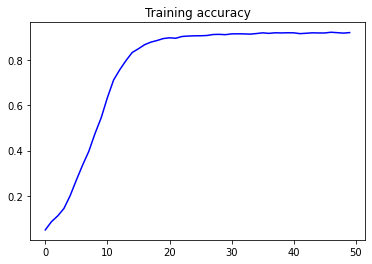

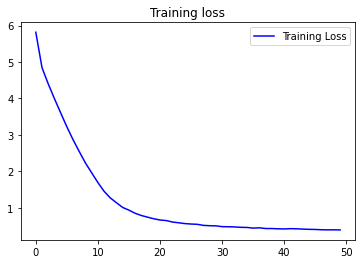

In [22]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [23]:
seed_text = "linux"
next_words = 10
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	# predicted = model.predict_classes(token_list, verbose=0)
	predicted = np.argmax(model.predict(token_list), axis=1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

linux certification edit edit source this book covers the linux professional institute family of certifications there are three levels of lpi certification level junior level linux professional level advanced level linux professional level senior level linux professional to obtain a certification a candidate is required to pass exams and for level and level to hold a lower level certification from the lpi all lpic candidates are encouraged to browse the documentation at the lpi website the resources there will familiarize the candidate with many things that are outside the scope of this book e g exam cost testing centers other training


## References

- https://www.kaggle.com/urslaanyouhan/word-generation
- https://www.kaggle.com/shivamb/beginners-guide-to-text-generation-using-lstms
- NLP on tensorflow from coursera